## ONLINE RETAIL DATASET 
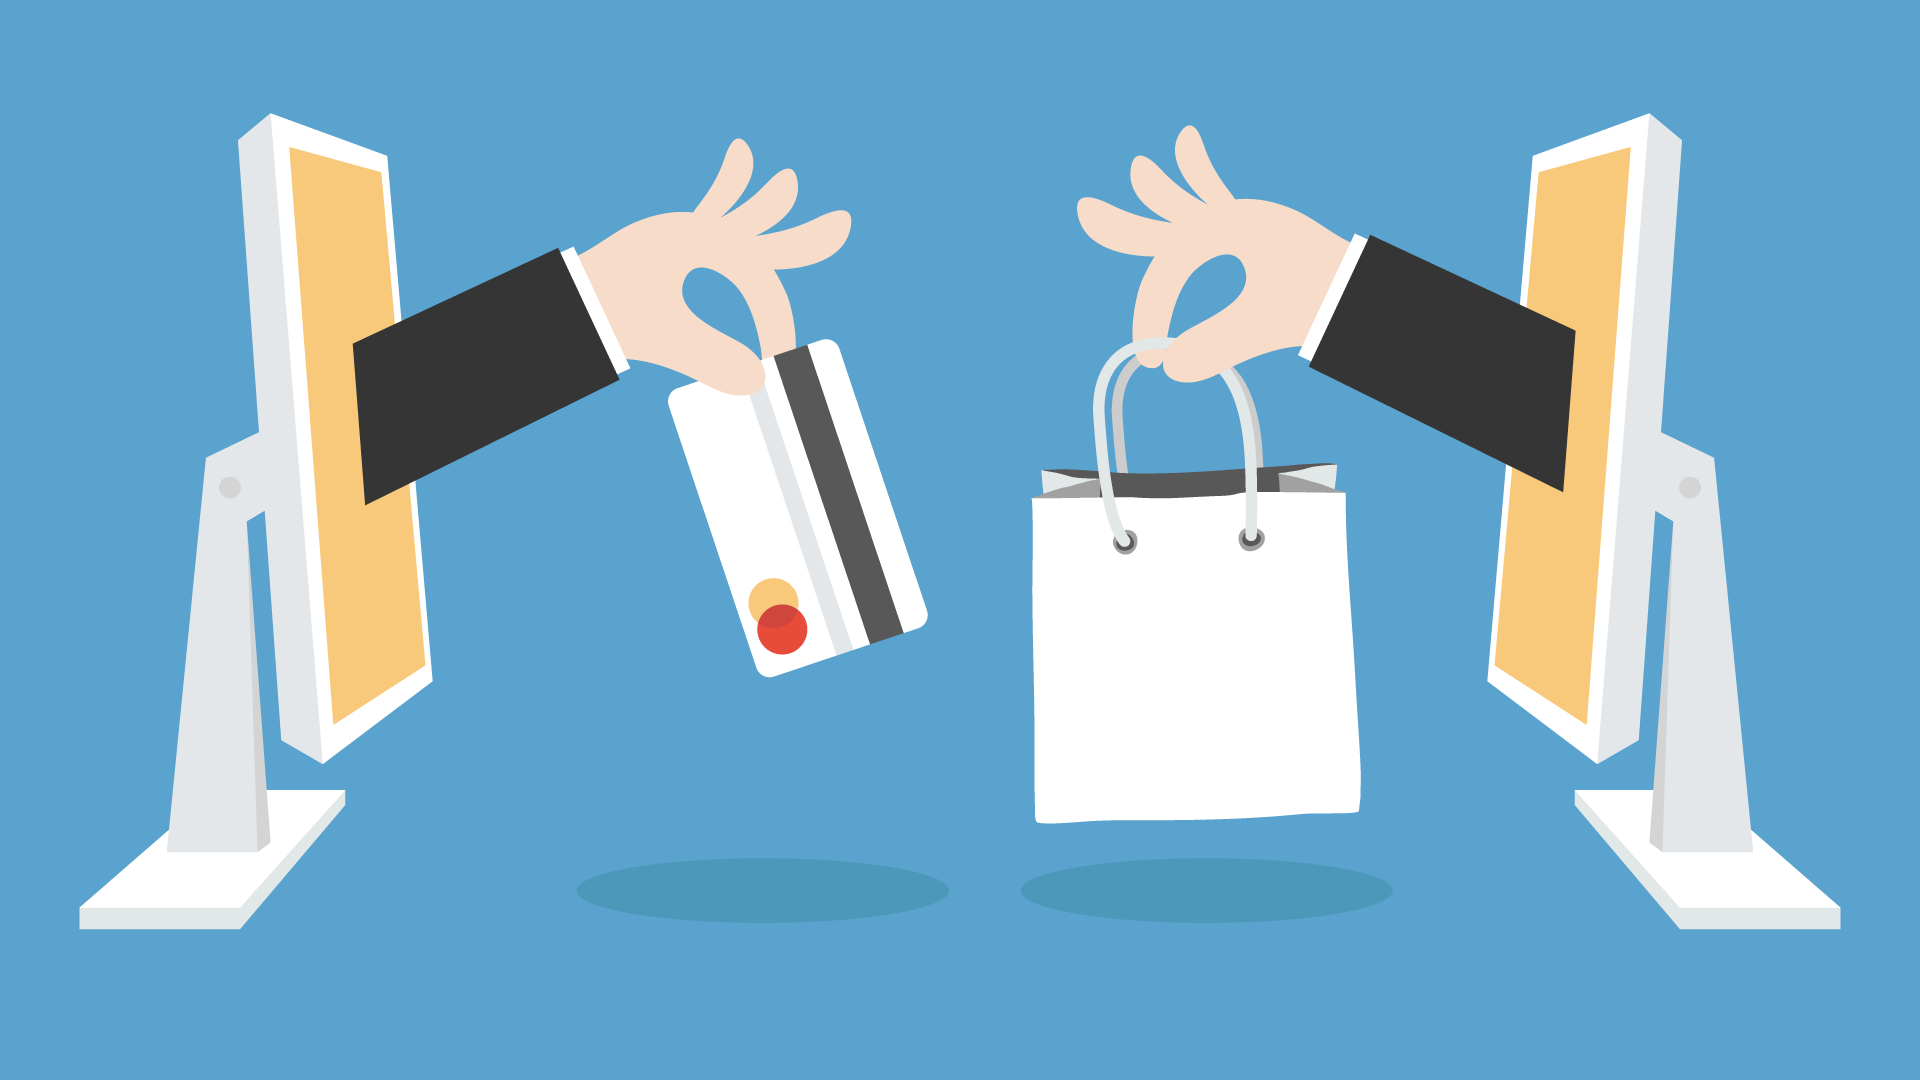


 **VERİ SETİ HAKKINDA**
 
01/12/2010 ile 09/12/2011 tarihleri arasında gerçekleşen tüm işlemleri içeren uluslararası bir veri setidir ve Birleşik Krallık merkezli ve kayıtlı bir mağaza dışı çevrimiçi perakendeye aittir. Şirket esasen her durumda kullanılabilecek benzersiz hediyeler satmaktadır. Şirketin birçok müşterisi toptancıdır.

**DEĞİŞKEN BİLGİSİ**
* StockCode: Ürün (madde) kodu. Nominal, her bir farklı ürüne benzersiz olarak atanmış 5 haneli tam sayı.
* Description: Ürün (madde) adı. Nominal.
* Quantity: Her bir ürün (madde) için işlem başına miktarlar. Sayısal.
* InvoiceDate: Fatura Tarihi ve saati. Sayısal, her işlemin oluşturulduğu gün ve saat.
* UnitPrice: Birim fiyat. Sayısal, ürünün birim fiyatı sterlin cinsinden.
* CustomerID: Müşteri numarası. Nominal, her bir müşteri için benzersiz olarak atanmış 5 haneli tam sayı.
* Country: Ülke adı. Nominal, her bir müşterinin ikamet ettiği ülkenin adı.n adı.

# 1.Kütüphaneler ve Veri Setinin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ = pd.read_csv(filepath_or_buffer="/kaggle/input/onlineretail/OnlineRetail.csv", encoding="latin-1")
df = df_.copy()

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:

## Veri setinde eksik veri oluşturduk.
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

# 1.1 Veriye Ön Bakış

In [5]:
df.isnull().sum()

InvoiceNo       15881
StockCode       16017
Description     17584
Quantity        15796
InvoiceDate     16099
UnitPrice       15890
CustomerID     147192
Country         16083
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    526028 non-null  object 
 1   StockCode    525892 non-null  object 
 2   Description  524325 non-null  object 
 3   Quantity     526113 non-null  float64
 4   InvoiceDate  525810 non-null  object 
 5   UnitPrice    526019 non-null  float64
 6   CustomerID   394717 non-null  float64
 7   Country      525826 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [7]:
cat_cols=[col for col in df.columns if str(df[col].dtypes) in ['category','object','bool']]
cat_cols
## OLASI KATEGORİK DEĞİŞKENLERİN TİP BİLGİSİ

['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']

In [8]:
df['CustomerID'] = df['CustomerID'].astype('category')
## Müşteri bazında analizi daha kolay yapmak için türü kategoriğe çevirildi.

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
## Tarih kolonlarında işlem yapmayı kolaylaştırmak için datetime formatına çevrildi.

In [10]:
df.shape

(541909, 8)

In [11]:
df.isnull().sum() / len(df) * 100
## Her bir değişkenin eksik değer sayısının
## toplam kayıt sayısına yüzdesel oranı

InvoiceNo       2.930566
StockCode       2.955662
Description     3.244825
Quantity        2.914881
InvoiceDate     2.970794
UnitPrice       2.932227
CustomerID     27.161756
Country         2.967841
dtype: float64

# 2.Eksik Veri Analizi

In [12]:
df['InvoiceNo'] = df['InvoiceNo'].ffill()
print(df[df['InvoiceNo'].isnull()])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


InvoiceNo kolonu sıralı bir şekilde tekrarlandığı için eksik değerleri bir sonraki satırdaki değeri alarak doldurmak mantıklı olacaktır.

In [13]:
!pip install missingno

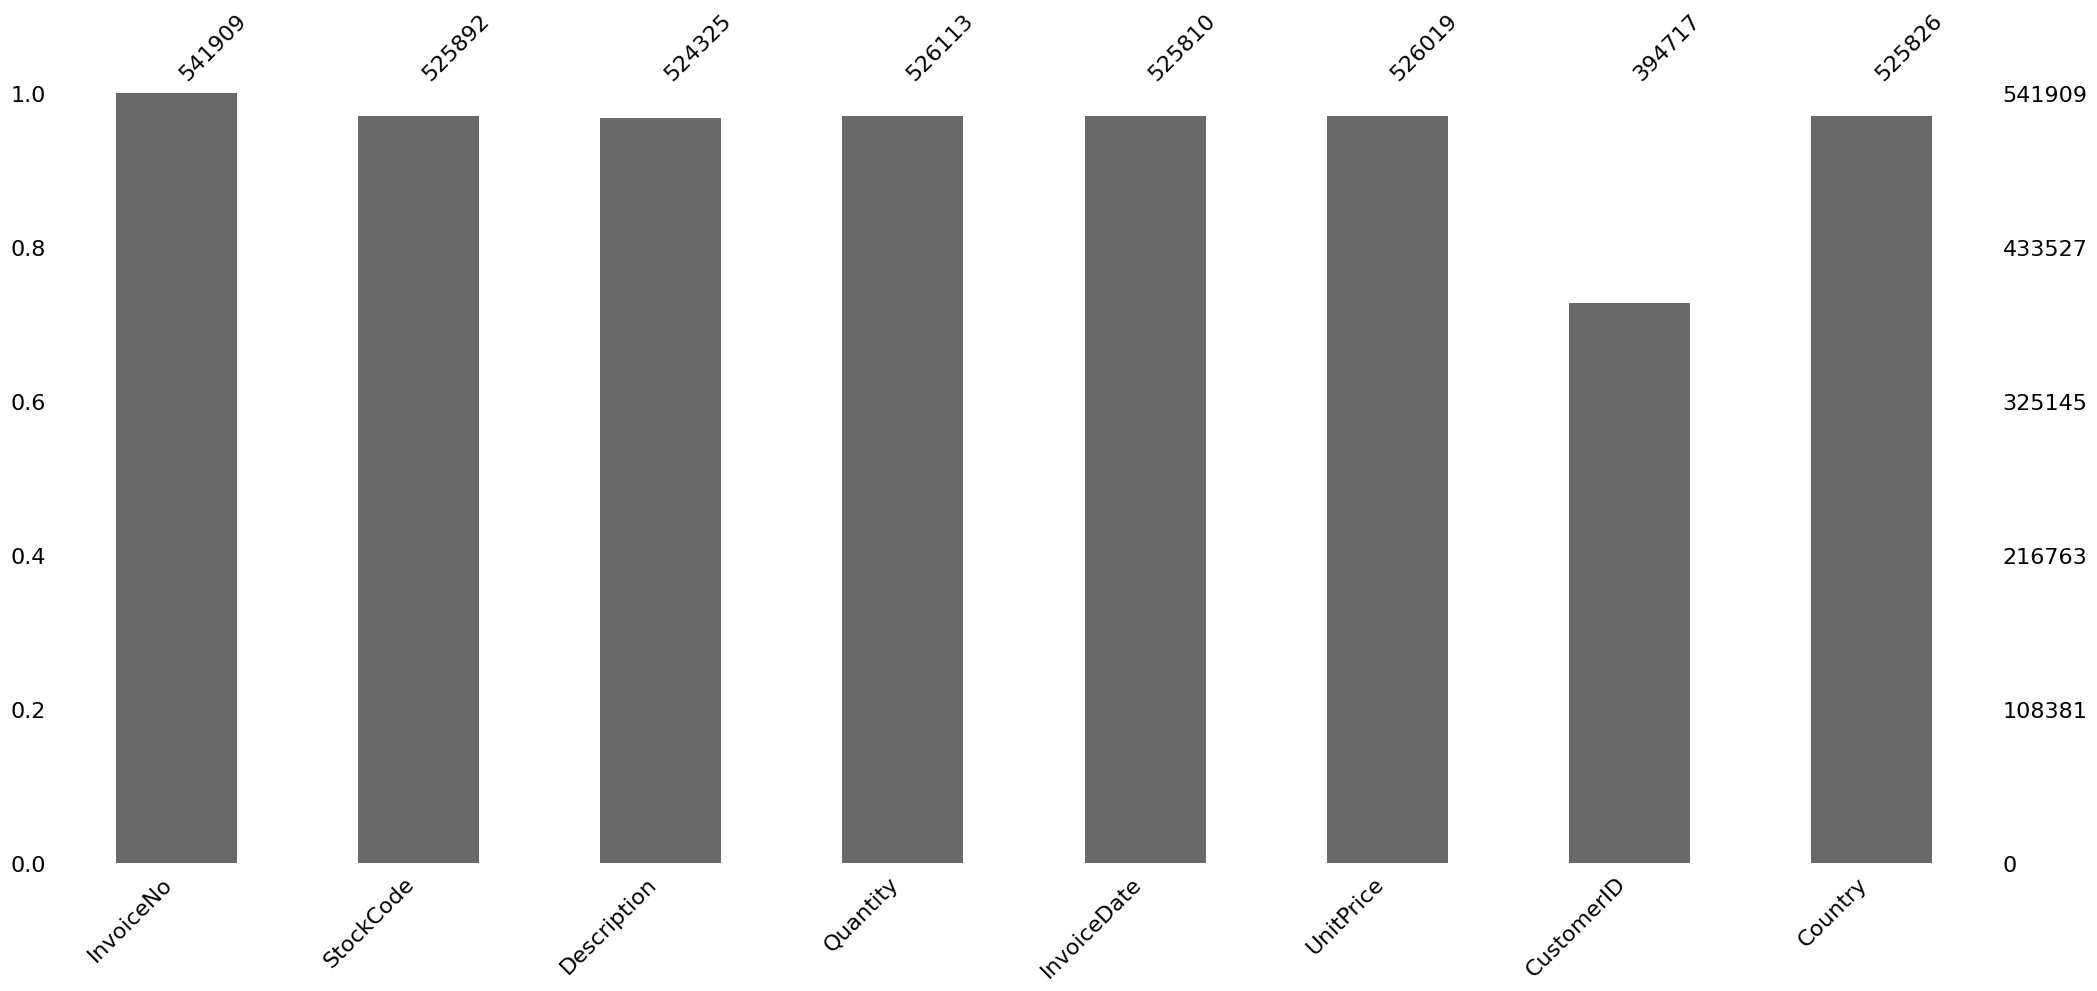

In [14]:
import missingno as msno
msno.bar(df);
## değişkenlerdeki eksikliği oransal olarak gözlemliyoruz.

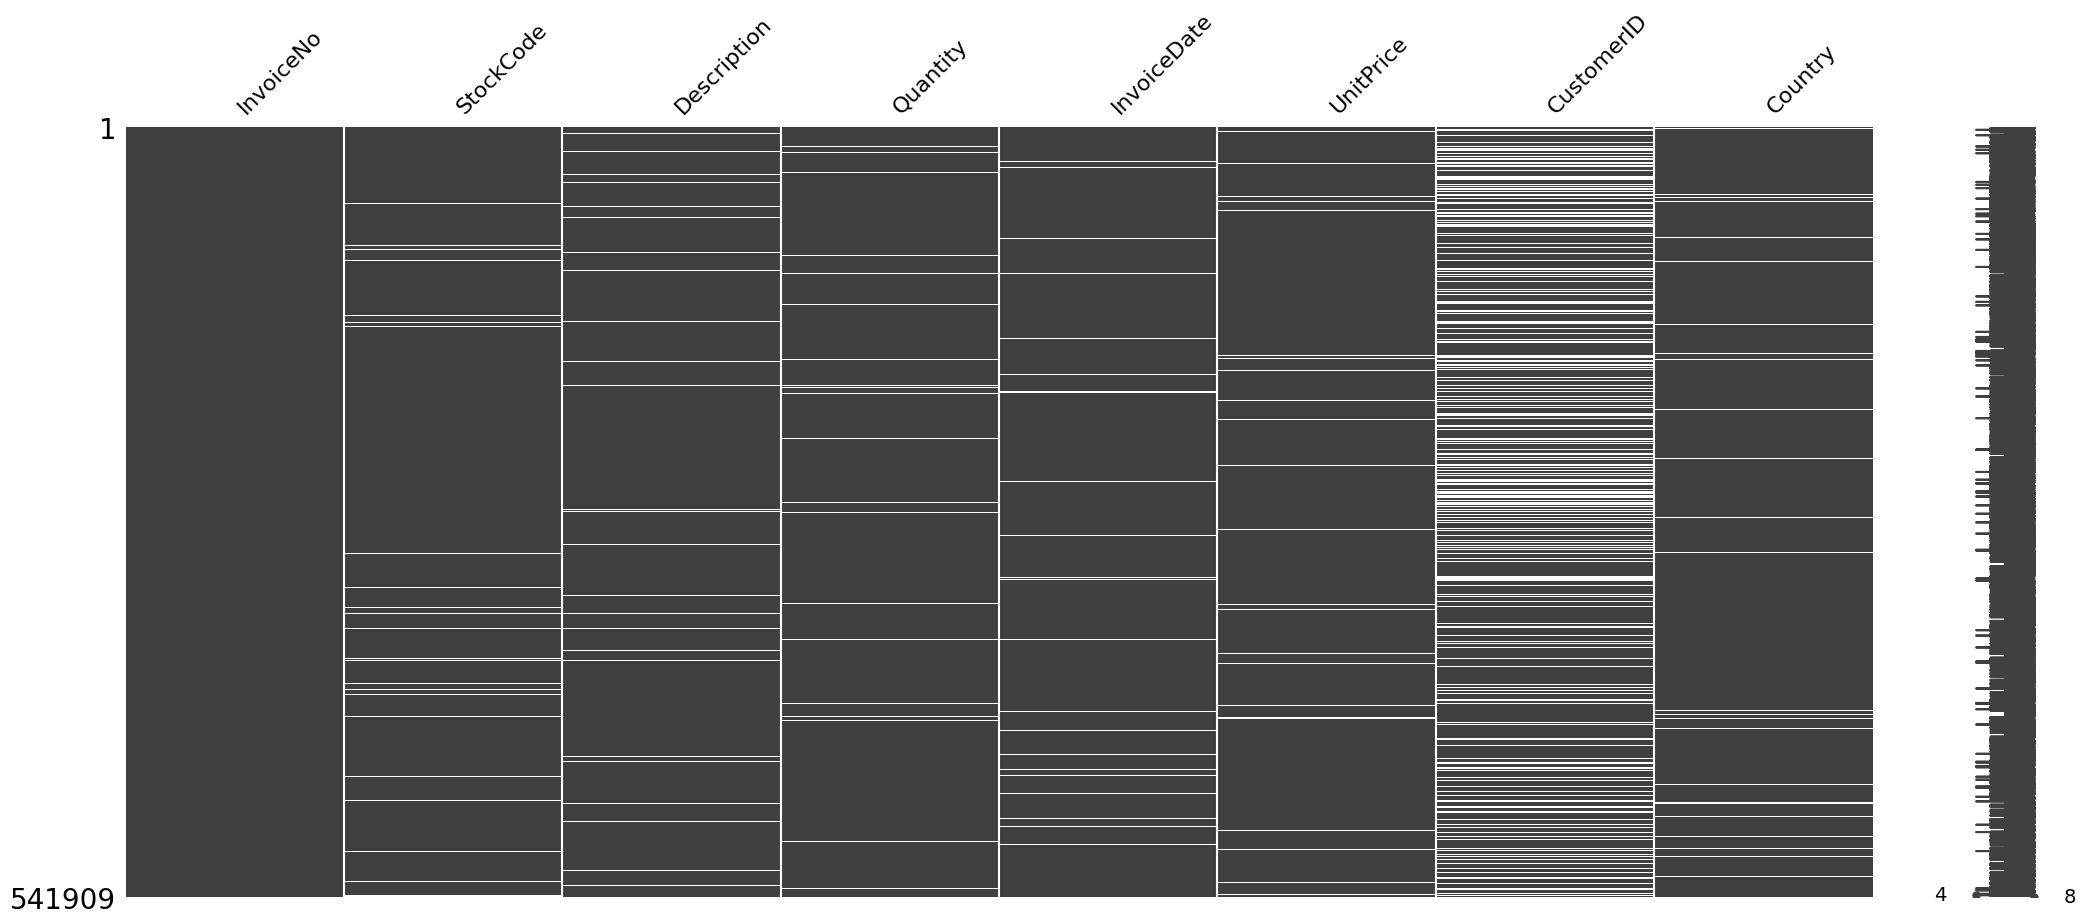

In [15]:
msno.matrix(df);

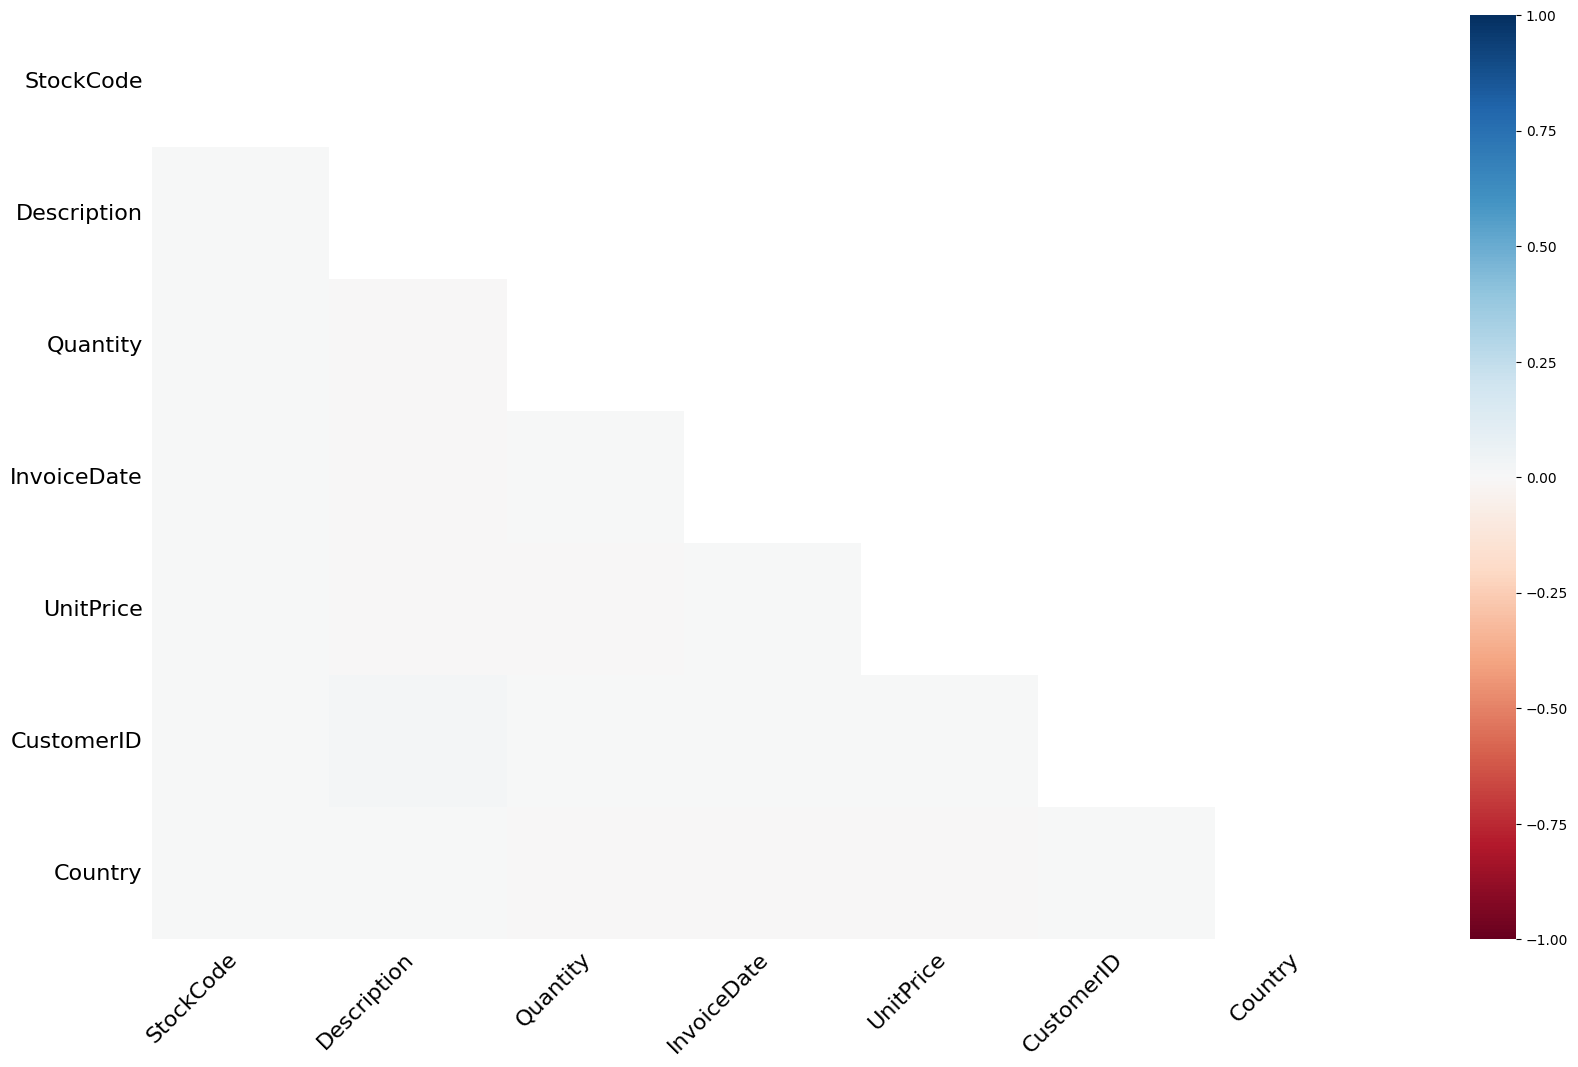

In [16]:
msno.heatmap(df);

In [17]:
print(df[['InvoiceNo', 'InvoiceDate']])

       InvoiceNo         InvoiceDate
0         536365 2010-12-01 08:26:00
1         536365 2010-12-01 08:26:00
2         536365 2010-12-01 08:26:00
3         536365 2010-12-01 08:26:00
4         536365 2010-12-01 08:26:00
...          ...                 ...
541904    581587 2011-12-09 12:50:00
541905    581587                 NaT
541906    581587 2011-12-09 12:50:00
541907    581587 2011-12-09 12:50:00
541908    581587 2011-12-09 12:50:00

[541909 rows x 2 columns]


Aynı InvoiceNo'ya sahip olan tüm satırlar aynı tarihte gerçekleşmiş bir işlemle ilgilidir. InvoiceNo'ya göre gruplama yaparak, InvoiceDate kolonunu her grup içinde eksik tarihler dolduruldu.

In [18]:
df['InvoiceDate'] = df.groupby('InvoiceNo')['InvoiceDate'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

print(df['InvoiceDate'].isnull().sum())

/tmp/ipykernel_17/3522667103.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['InvoiceDate'] = df.groupby('InvoiceNo')['InvoiceDate'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


152


In [19]:
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Detaylı bakıldığında InvoiceDate kolonunda neden doldurma işlemi yapılmasına rağmen geriye 152 adet eksik veri kaldığını görüyoruz. Bunun nedeni sadece bir adet InvoiceNo olan satırlarda başka referans alınacak InvoiceDate değeri olmadığı için değer atanamadı.
Geriye kalan 152 eksik değer bir önceki satırdaki tarih baz alınarak dolduruldu.

In [20]:
df['InvoiceDate'] = df['InvoiceDate'].fillna(method='ffill')

print(df['InvoiceDate'].isnull().sum())


0


/tmp/ipykernel_17/2410375276.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['InvoiceDate'] = df['InvoiceDate'].fillna(method='ffill')


Veri setindeki her ürünün benzersiz bir StockCode değeri olduğundan, Description ile StockCode arasında birebir bir ilişki bulunmaktadır. Bu nedenle, StockCode kolonundaki eksik değerler, aynı Description değerine sahip olan satırlardan türeterek dolduruldu.

In [21]:
description_to_stockcode = df[['Description', 'StockCode']].dropna().drop_duplicates()
description_to_stockcode = description_to_stockcode.set_index('Description')['StockCode'].to_dict()

df['StockCode'] = df.apply(
    lambda row: description_to_stockcode[row['Description']] if pd.isnull(row['StockCode']) and row['Description'] in description_to_stockcode else row['StockCode'],
    axis=1
)

print(f"StockCode'da kalan eksik değer sayısı: {df['StockCode'].isnull().sum()}")


StockCode'da kalan eksik değer sayısı: 559


In [22]:
stockcode_to_description = df.dropna(subset=['StockCode', 'Description']).drop_duplicates('StockCode').set_index('StockCode')['Description'].to_dict()

df['Description'] = df.apply(
    lambda row: stockcode_to_description.get(row['StockCode'], row['Description'])
    if pd.isnull(row['Description']) else row['Description'], axis=1
)

print(f"Description'da kalan eksik değer sayısı: {df['Description'].isnull().sum()}")

Description'da kalan eksik değer sayısı: 666


Kalan eksik değerleri anlamlı bir şekilde doldurmak, veri kaybı yaşamamak ve veri setinin bütünlüğü korumak amacıyla eksik değerler 'No Description' ve 'Unknown' ile dolduruldu.

In [23]:

df['Description'] = df['Description'].fillna('No Description')
df['StockCode'] = df['StockCode'].fillna('Unknown')


In [24]:
invoiceno_to_country = df.dropna(subset=['InvoiceNo', 'Country']).drop_duplicates('InvoiceNo').set_index('InvoiceNo')['Country'].to_dict()

df['Country'] = df.apply(
    lambda row: invoiceno_to_country.get(row['InvoiceNo'], row['Country'])
    if pd.isnull(row['Country']) else row['Country'], axis=1
)

print(df['Country'].isnull().sum())

197


Kalan 197 eksik değer veriler sıralı olduğu için bir önceki satırın değeri ile dolduruldu

In [25]:
df['Country'] = df['Country'].fillna(method='ffill')
print(df['Country'].isnull().sum())

0


/tmp/ipykernel_17/2499374339.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Country'] = df['Country'].fillna(method='ffill')


In [26]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity        15796
InvoiceDate         0
UnitPrice       15890
CustomerID     147192
Country             0
dtype: int64

In [27]:
df['CustomerID'] = df.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.fillna(method='ffill'))
print(df['CustomerID'].isnull().sum())

/tmp/ipykernel_17/2033384975.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CustomerID'] = df.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.fillna(method='ffill'))


135691


In [28]:
df['CustomerID'] = df['CustomerID'].fillna(method='bfill') 
print(df['CustomerID'].isnull().sum())

0


/tmp/ipykernel_17/3751484761.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CustomerID'] = df['CustomerID'].fillna(method='bfill')


Her ürünün unique bir stockcode değeri olduğu için UnitPrice kolonu StockCode değerine göre dolduruldu. Geriye kalan eksik değerler Description kolonundaki eşleşmeye göre dolduruldu.

In [29]:
stockcode_price_group = df.groupby('StockCode')['UnitPrice'].mean()
description_price_group = df.groupby('Description')['UnitPrice'].mean()


df['UnitPrice'] = df['UnitPrice'].fillna(df['StockCode'].map(stockcode_price_group))

df['UnitPrice'] = df['UnitPrice'].fillna(df['Description'].map(description_price_group))


In [30]:
Quantity_group = df.groupby(['StockCode', 'Description'])['Quantity'].median()

df['Quantity'] = df.apply(
    lambda row: Quantity_group[row['StockCode'], row['Description']]
    if pd.isna(row['Quantity']) and (row['StockCode'], row['Description']) in Quantity_group
    else row['Quantity'], axis=1
)

In [31]:
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity       17
InvoiceDate     0
UnitPrice       5
CustomerID      0
Country         0
dtype: int64

In [32]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].median())

In [33]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [34]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice
count  541909.000000                         541909  541909.000000
mean        9.422643  2011-07-04 13:34:56.675751936       4.621044
min    -80995.000000            2010-12-01 08:26:00  -11062.060000
25%         1.000000            2011-03-28 11:34:00       1.250000
50%         3.000000            2011-07-19 17:17:00       2.080000
75%        10.000000            2011-10-19 11:27:00       4.130000
max     80995.000000            2011-12-09 12:50:00   38970.000000
std       217.973652                            NaN      96.821591


* Satılan ürünlerin ortalama miktarı 9.42'dir.
* -80,995 gibi sıra dışı bir negatif değer var. Bu veri setinde aykırı değerler olduğunu göstermektedir.
* Medyan 3’tür, yani çoğu işlem 3 adet ürün içermektedir.
* 80,995 adet gibi çok yüksek bir miktar var. Bu bir hata olabilir veya toplu alımları temsil edebilir.
* 217.97 gibi yüksek bir standart sapma var. Bu, veride büyük bir dağılım olduğunu gösterir.
* 2010-12-01 08:26:00. Veri setindeki en eski işlem bu tarihte yapılmış.
* 2011-12-09 12:50:00. Veri setindeki en güncel işlem bu tarihte yapılmış.
* Ortalama birim fiyat 4.62.
* -11,062.06 gibi sıra dışı bir negatif değer var. Negatif fiyatlar mantıklı olmadığından bunlar veri hatası olabilir.
* 96.82 gibi çok büyük bir standart sapma var. Birim fiyatlar arasında ciddi bir değişkenlik mevcut.

# 3.Aykırı Değer Analizi

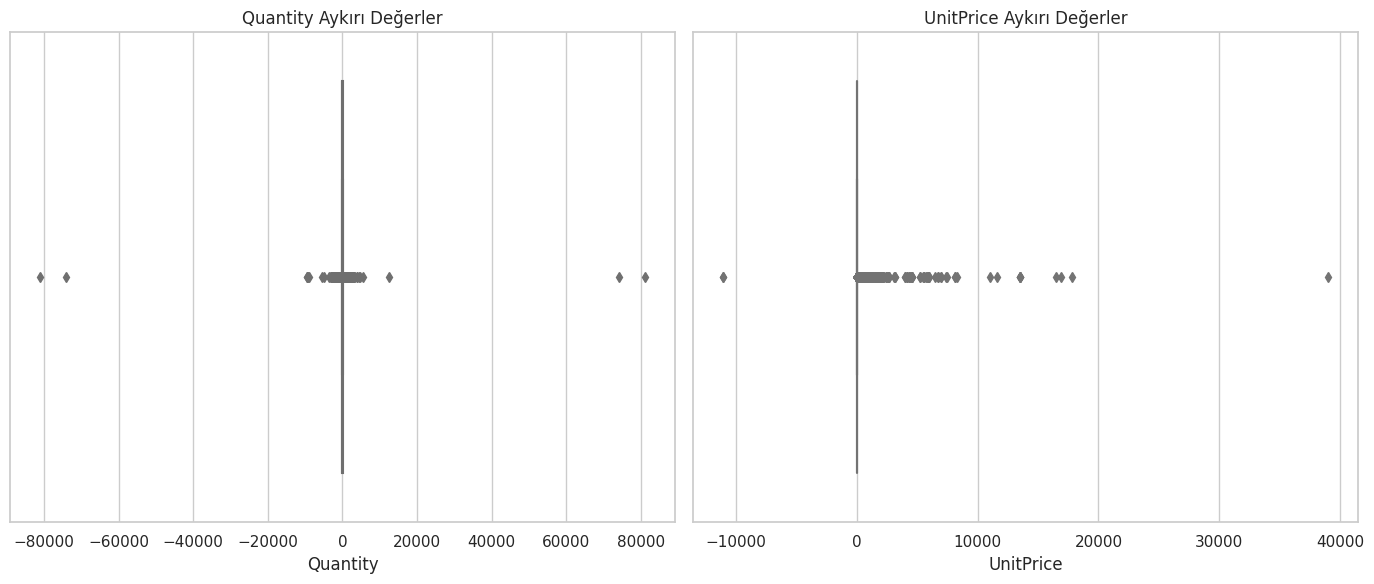

In [35]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Quantity', color='skyblue')
plt.title('Quantity Aykırı Değerler')
plt.xlabel('Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='UnitPrice', color='lightgreen')
plt.title('UnitPrice Aykırı Değerler')
plt.xlabel('UnitPrice')

plt.tight_layout()
plt.show()

In [36]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75) 
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

In [37]:
Q1 = df['UnitPrice'].quantile(0.25) 
Q3 = df['UnitPrice'].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df=df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]

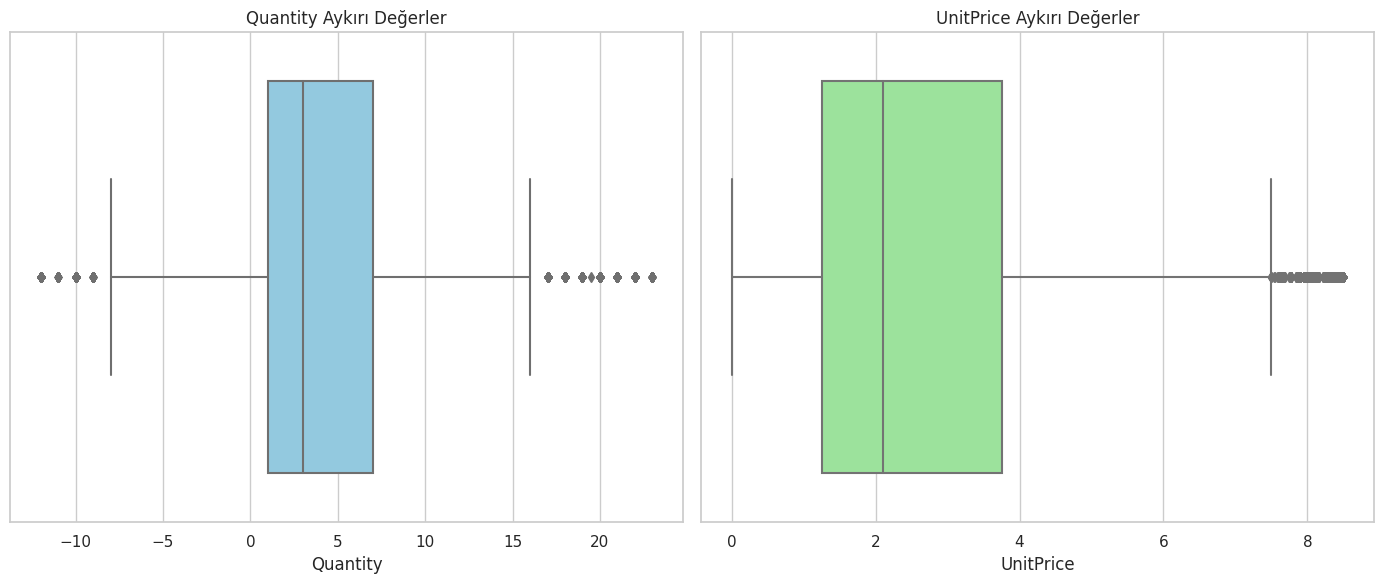

In [38]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Quantity', color='skyblue')
plt.title('Quantity Aykırı Değerler')
plt.xlabel('Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='UnitPrice', color='lightgreen')
plt.title('UnitPrice Aykırı Değerler')
plt.xlabel('UnitPrice')

plt.tight_layout()
plt.show()

# 4.Feature Engineering

In [39]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

'TotalPrice' adında yeni bir kolon oluşturuldu.

In [40]:
## En çok satılan ürünler
top_selling_products = df.groupby('Description').agg({
    'Quantity': 'sum'
}).reset_index()

top_selling_products = top_selling_products.sort_values(by='Quantity', ascending=False).head(10)
print(top_selling_products)

                             Description  Quantity
1739             JUMBO BAG RED RETROSPOT   14064.0
210        ASSORTED COLOUR BIRD ORNAMENT   11198.0
3690  WHITE HANGING HEART T-LIGHT HOLDER   10933.0
1909             LUNCH BAG RED RETROSPOT   10531.0
1901             LUNCH BAG  BLACK SKULL.    8119.0
1904                 LUNCH BAG CARS BLUE    7997.0
1705              JAM MAKING SET PRINTED    7840.0
1737             JUMBO BAG PINK POLKADOT    7512.0
1903              LUNCH BAG APPLE DESIGN    7459.0
1911          LUNCH BAG SPACEBOY DESIGN     7197.0


In [41]:
# En yüksek gelir getiren ürünler
top_revenue_products = df.groupby('Description').agg({
    'TotalPrice': 'sum'
}).reset_index()

top_revenue_products = top_revenue_products.sort_values(by='TotalPrice', ascending=False).head(10)
print(top_revenue_products)


                             Description    TotalPrice
3690  WHITE HANGING HEART T-LIGHT HOLDER  34251.669368
2301                       PARTY BUNTING  34084.839278
1739             JUMBO BAG RED RETROSPOT  32570.226746
1706            JAM MAKING SET WITH JARS  23542.224047
3321                      SPOTTY BUNTING  22611.006012
2271     PAPER CHAIN KIT 50'S CHRISTMAS   20427.209197
2094     NATURAL SLATE HEART CHALKBOARD   20233.249233
1909             LUNCH BAG RED RETROSPOT  19991.620488
986        DOORMAT KEEP CALM AND COME IN  19625.890000
210        ASSORTED COLOUR BIRD ORNAMENT  19490.863103


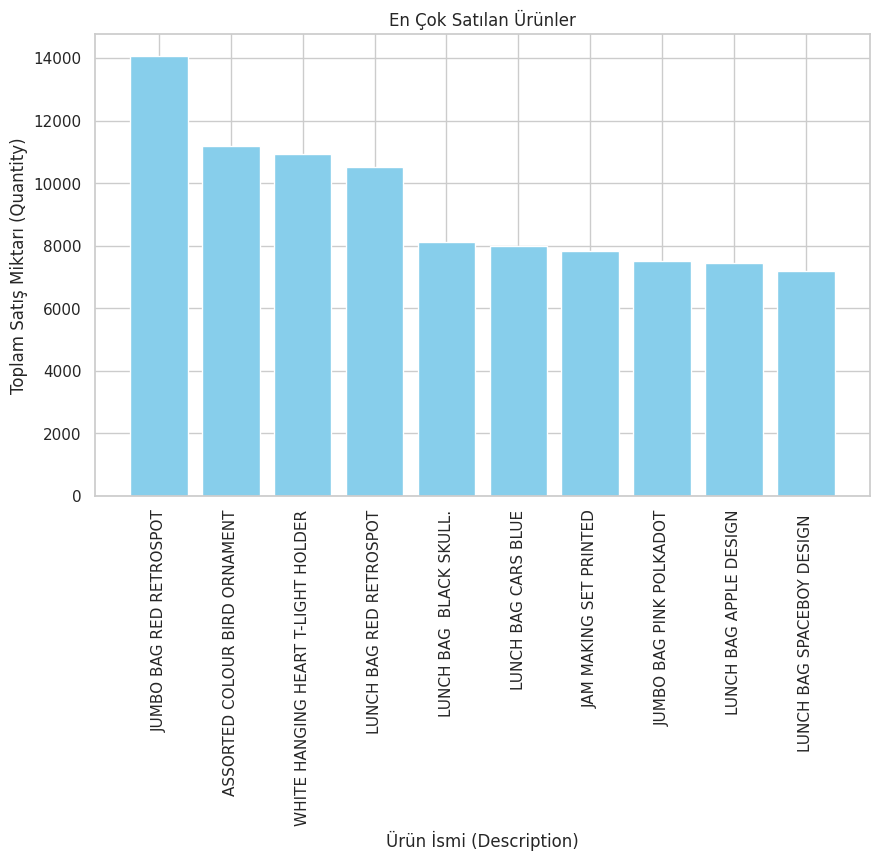

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(top_selling_products['Description'], top_selling_products['Quantity'], color='skyblue')
plt.xlabel('Ürün İsmi (Description)')
plt.ylabel('Toplam Satış Miktarı (Quantity)')
plt.title('En Çok Satılan Ürünler')
plt.xticks(rotation=90)
plt.show()

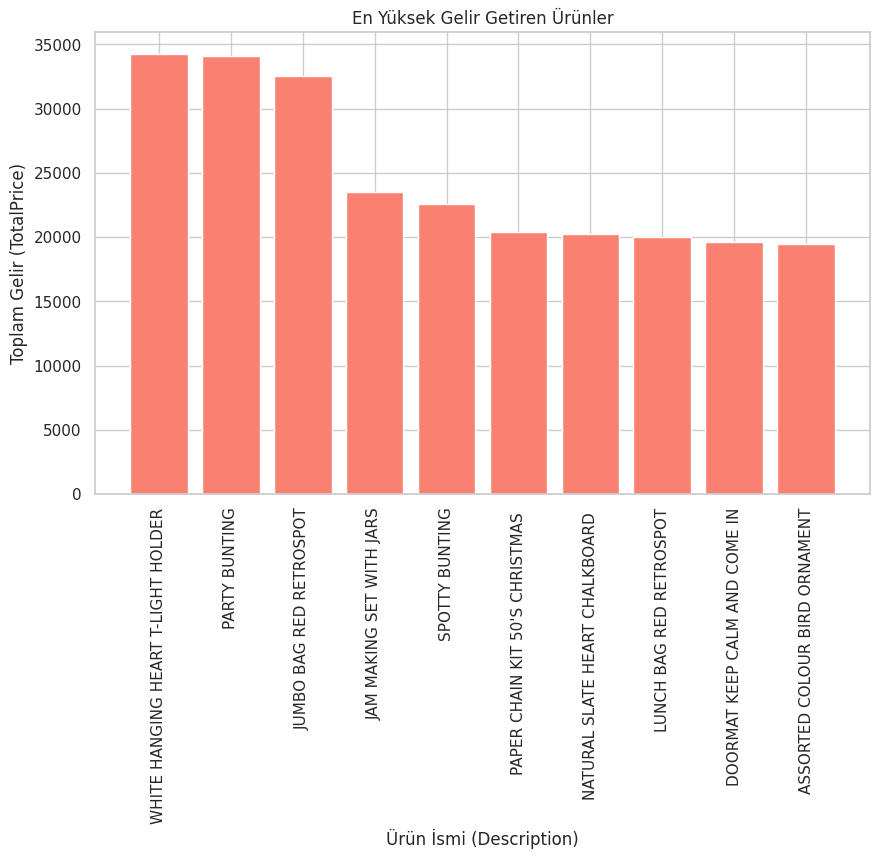

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(top_revenue_products['Description'], top_revenue_products['TotalPrice'], color='salmon')
plt.xlabel('Ürün İsmi (Description)')
plt.ylabel('Toplam Gelir (TotalPrice)')
plt.title('En Yüksek Gelir Getiren Ürünler')
plt.xticks(rotation=90)
plt.show()


Grafik, en yüksek gelir getiren ürünlerin toplam gelir (TotalPrice) bazında sıralamasını göstermektedir. Çubuklar her bir ürünün toplam gelirini temsil etmektedir.

"WHITE HANGING HEART T-LIGHT HOLDER" ve "PARTY BUNTING" en yüksek geliri sağlayan ürünlerdir. Her iki ürün de yaklaşık 35.000 toplam gelir ile listenin zirvesindedir. Bu, bu ürünlerin popüler ve yüksek talep gördüğünü göstermektedir.

"JUMBO BAG RED RETROSPOT" ve "JAM MAKING SET WITH JARS" da yüksek gelir elde eden ürünler arasında yer alıyor.
Gelir seviyeleri, listedeki ürünler arasında nispeten yakın bir dağılım gösteriyor ancak bazı ürünlerin gelirleri diğerlerine göre biraz daha düşük.



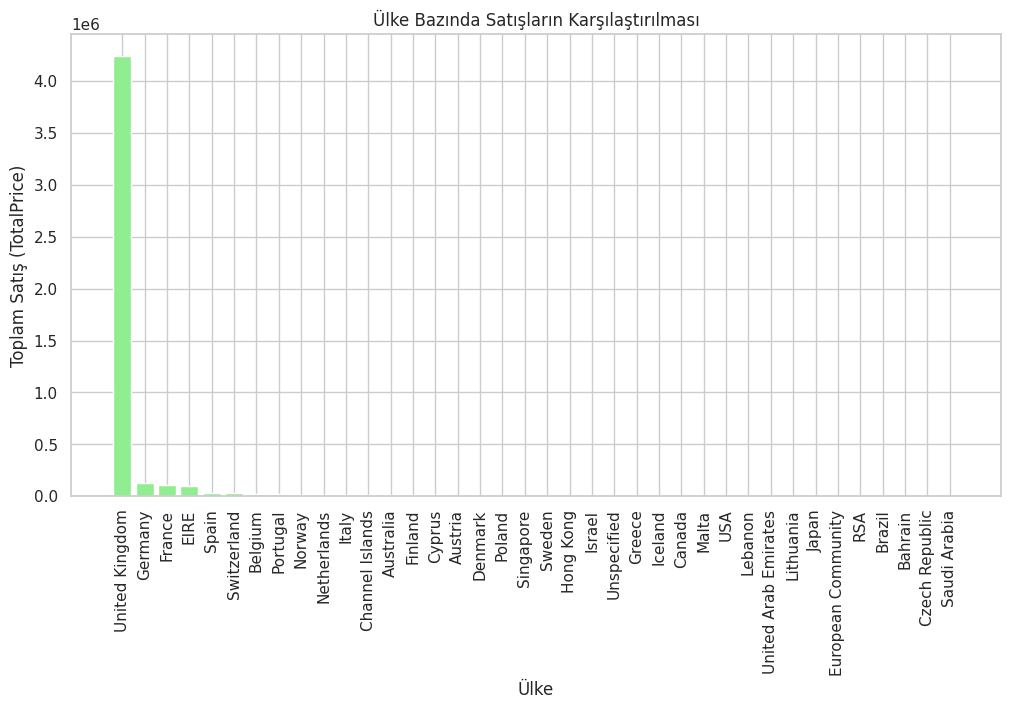

In [44]:

country_sales = df.groupby('Country').agg({
    'TotalPrice': 'sum'
}).reset_index()

country_sales = country_sales.sort_values(by='TotalPrice', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(country_sales['Country'], country_sales['TotalPrice'], color='lightgreen')
plt.xlabel('Ülke')
plt.ylabel('Toplam Satış (TotalPrice)')
plt.title('Ülke Bazında Satışların Karşılaştırılması')
plt.xticks(rotation=90)
plt.show()

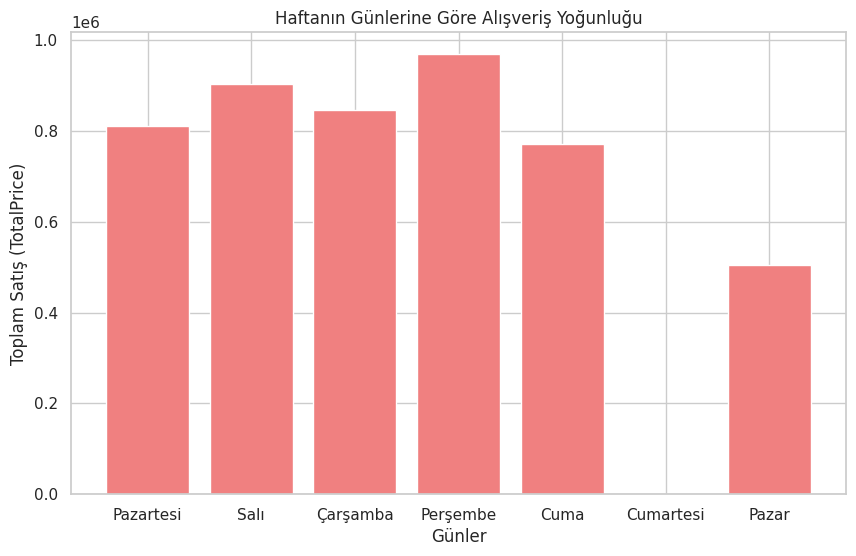

In [45]:
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

dayofweek_sales = df.groupby('DayOfWeek').agg({
    'TotalPrice': 'sum'}).reset_index()

daysofweek = pd.DataFrame({'DayOfWeek': [5], 'TotalPrice': [0]})

dayofweek_sales = pd.concat([dayofweek_sales, daysofweek], ignore_index=True)

day_labels = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']

plt.figure(figsize=(10, 6))
plt.bar(dayofweek_sales['DayOfWeek'], dayofweek_sales['TotalPrice'], color='lightcoral')
plt.xlabel('Günler')
plt.ylabel('Toplam Satış (TotalPrice)')
plt.title('Haftanın Günlerine Göre Alışveriş Yoğunluğu')

plt.xticks(range(7), day_labels)
plt.show()


Grafikte, haftanın günlerine göre toplam satış (TotalPrice) yoğunluğu gösterilmiştir. Her bir çubuk, belirli bir günün toplam satış miktarını temsil ediyor.
  Perşembe günleri, haftanın diğer günlerine göre en yüksek toplam satış değerine sahiptir. Bu, Perşembe gününün alışveriş yapmak için en popüler günlerden biri olduğunu göstermektedir.
  

# 5.Sonuç ve Öneriler

Online Retail veri seti, bir e-ticaret şirketinin satış ve müşteri davranışlarını analiz etmeye yönelik kullanışlı bir kaynaktır. Şirket, müşteri davranışlarına dayalı olarak satışları artırmayı ve müşteri memnuniyetini optimize etmeyi hedefliyor. Bunun için:
* Müşterilerin alışveriş alışkanlıklarını analiz ederek müşteri segmentasyonu yapmak,
* Ürünlerin satış performansını değerlendirerek en çok satan ürünlerin stoklarını optimize etmek,
* Hangi müşteri gruplarının daha kârlı olduğunu analiz etmek için RFM analizi uygulanabilir.

  Ürün bazında satış tahmini yapmak için Linear Regression veya Random Forest kullanılabilir. Bu modeller, ürün fiyatları, satış miktarları, ülke gibi değişkenlere dayalı olarak gelecekteki satış trendlerini tahmin edebilir.
Örneğin: "Bu ürünün Aralık ayında kaç adet satılması bekleniyor?"

  Bu yaklaşımlar, şirketin hem satışlarını artırmasına hem de operasyonel verimliliğini geliştirmesine katkı sağlayacaktır.